# <span style="color:red"> NUMERICAL EXERCISES 02 </span>

## <span style="color:blue">Exercise 02.1 </span>

###### Evaluation of  $I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$  with MC methods.

The graphs show the progressive estimation of the integral with error bars for three different evaluations of the integral, i.e., extracting the points:
- uniformly: $p(x)=1$;
- with importance sampling (parabola tangent in the origin and with same monotonicity and zeros): $p(x)=3/2(1-x^2)$;
- with "bad sampling" (parabola with inverted maxima and zeros): $p(x)=3(x^2)$.

I have reported a graph with all three ratings and a graph with only the first two for scale issues (the "bad sampling" is truly bad!).

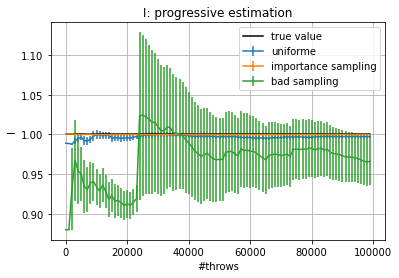

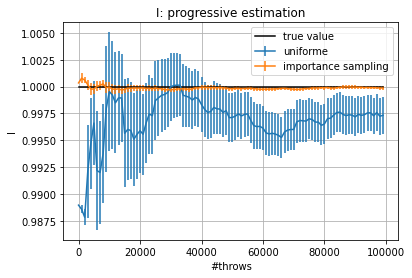

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N

x = np.arange(N)      # [0,1,2,...,N-1]
z = np.ones(N)

sum_prog, err_prog = np.loadtxt("data/uniforme.txt", usecols =(0,1), unpack = 'true')
sum_prog2, err_prog2 = np.loadtxt("data/sampling.txt", usecols =(0,1), unpack = 'true')
sum_prog3, err_prog3 = np.loadtxt("data/bad_sampling.txt", usecols =(0,1), unpack = 'true')
    
    
x*=L # Number of throws = block * (Number of throws in each block)

plt.errorbar(x,sum_prog,yerr=err_prog, label='uniforme')
plt.errorbar(x,sum_prog2,yerr=err_prog2, label='importance sampling')
plt.errorbar(x,sum_prog3,yerr=err_prog3, label='bad sampling')
plt.plot(x,z, color='black', label='true value')
plt.xlabel('#throws')
plt.ylabel('I')
plt.title("I: progressive estimation")
plt.grid(True)
plt.legend()

plt.figure()
plt.errorbar(x,sum_prog,yerr=err_prog, label='uniforme')
plt.errorbar(x,sum_prog2,yerr=err_prog2, label='importance sampling')
plt.plot(x,z,color='black', label='true value')
plt.xlabel('#throws')
plt.ylabel('I')
plt.title("I: progressive estimation")
plt.grid(True)
plt.legend()

plt.show()

## <span style="color:blue">Exercise 02.2 </span>

##### SIMULATION RANDOM WALKS 100 STEPS

- on a cubic lattice (step = 1);
- in the continuum (step = 1).

For each of the two possibilities I made two graphs.

The first graph represents the standard deviation of the RW as a function of step. The fit $y=a\sqrt{x}$ to this graph proves the diffusion law $\sigma=d^2\sqrt{n}$ (where $\sigma$ is the std dev at the step $n$ of the RW and $d$ is the lenght of the step (1 in this case)), if one sees the RW as a stochastic process, or equivalently the LCT $\sigma=\sigma_1\sqrt{n}$ (where $\sigma$ is the std dev at the step $n$ of the RW $\sigma_1$ is std dev of a single step (1 in this case)), if one sees the RW as a sum of distributions with zero mean and finite variance.

The second graph has the same spirit as those in Exercise 1, i.e., it represents the progressive standard deviation (with error bars) of the position at the 100th step of the RW, as a function of the number of blocks.

##### CUBIC LATTICE

Fit of y = k*sqrt(x):
Value of k: 
[1.01002024]
Error: 
[[3.36669124e-06]]


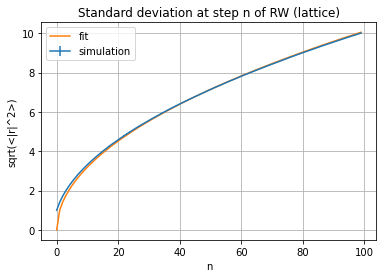

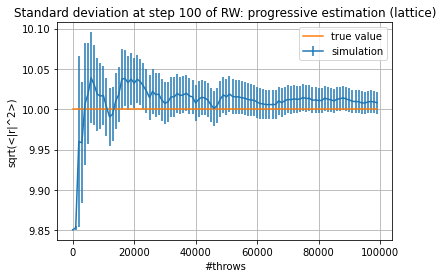

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
P=100                 # Number of steps in a RW

x = np.arange(N)      # [0,1,2,...,N-1]
z = np.ones(N)
z = z*10

sum_prog, err_prog = np.loadtxt("data/lattice.txt", usecols =(0,1), unpack = 'true')

plt.errorbar(x,sum_prog,yerr=err_prog, label='simulation')
plt.title("Standard deviation at step n of RW (lattice)")
plt.xlabel('n')
plt.ylabel('sqrt(<|r|^2>)')
plt.grid(True)

def f(x,a):
    return a*x**0.5

p_opt, p_cov = curve_fit(f, x, sum_prog)
y_fit= f(x, p_opt)
plt.plot(x,y_fit, label='fit')
print("Fit of y = k*sqrt(x):")
print("Value of k: ")
print(p_opt)
print("Error: ")
print(p_cov)
plt.legend()

plt.figure()

x*=L # Number of throws = block * (Number of throws in each block) 
sum_prog2, err_prog2 = np.loadtxt("data/latticefinale.txt", usecols =(0,1), unpack = 'true')

plt.errorbar(x,sum_prog2,yerr=err_prog2, label='simulation')
plt.title("Standard deviation at step 100 of RW: progressive estimation (lattice)")
plt.xlabel('#throws')
plt.ylabel('sqrt(<|r|^2>)')
plt.grid(True)
plt.plot(x,z, label='true value')
plt.legend()

plt.show()

##### CONTINUUM

Fit of y = k*sqrt(x):
Value of k: 
[1.00780983]
Error: 
[[3.38441724e-06]]


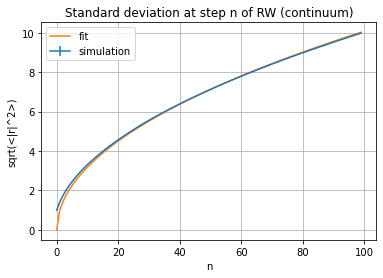

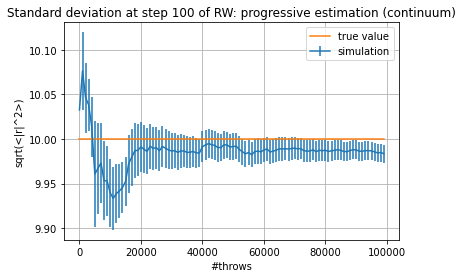

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

M=100000              # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
P=100                 # Number of steps in a RW

x = np.arange(N)      # [0,1,2,...,N-1]
z = np.ones(N)
z = z*10

sum_prog, err_prog = np.loadtxt("data/continuo.txt", usecols =(0,1), unpack = 'true')

plt.errorbar(x,sum_prog,yerr=err_prog, label='simulation')
plt.title('Standard deviation at step n of RW (continuum)')
plt.xlabel('n')
plt.ylabel('sqrt(<|r|^2>)')
plt.grid(True)

def f(x,a):
    return a*x**0.5

p_opt, p_cov = curve_fit(f, x, sum_prog)
y_fit= f(x, p_opt)
plt.plot(x,y_fit, label='fit')
print("Fit of y = k*sqrt(x):")
print("Value of k: ")
print(p_opt)
print("Error: ")
print(p_cov)
plt.legend()

plt.figure()

x*=L # Number of throws = block * (Number of throws in each block) 
sum_prog2, err_prog2 = np.loadtxt("data/continuofinale.txt", usecols =(0,1), unpack = 'true')

plt.errorbar(x,sum_prog2,yerr=err_prog2, label='simulation')
plt.title("Standard deviation at step 100 of RW: progressive estimation (continuum)")
plt.xlabel('#throws')
plt.ylabel('sqrt(<|r|^2>)')
plt.grid(True)
plt.plot(x,z, label='true value')
plt.legend()

plt.show()

##### 3D REPRESENTATION OF A RW

To see an example of RW...

C:\Users\giova\AppData\Local\Temp/ipykernel_11244/1332410026.py:9: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
C:\Users\giova\AppData\Local\Temp/ipykernel_11244/1332410026.py:20: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


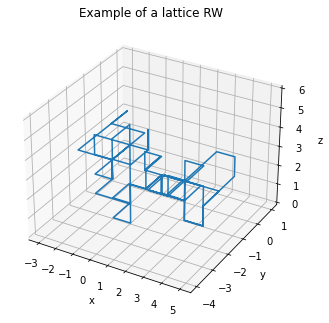

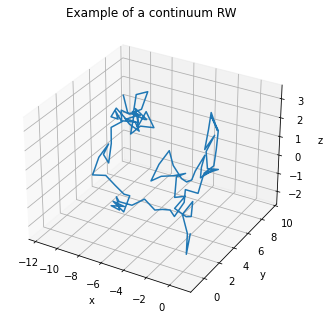

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

X,Y,Z = np.loadtxt("data/latticeRW.txt", usecols =(0,1,2), unpack = 'true')

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X,Y,Z)
#ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Example of a lattice RW")

X,Y,Z = np.loadtxt("data/continuoRW.txt", usecols =(0,1,2), unpack = 'true')

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(X,Y,Z)
#ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Example of a continuum RW")

plt.show()